'''
Data Analysis Project Steps:
1. Create a Problem Statement.
2. Identify the data you want to analyze.
3. Explore and Clean the data.
4. Analyze the data to get useful insights.
5. Present the data in terms of reports or dashboards using visualization.
'''

Title: Analysis of Hotel Booking Cancellation Rates Based on Hotel Expense

1. Introduction:
Hotel booking cancellation rates are an important aspect of the hospitality industry, affecting both hotels and customers. This report examines the relationship between hotel expenses and cancellation rates, with a focus on various booking channels. The analysis aims to identify patterns and trends that can help hotel management and online travel agencies (OTAs) optimize their operations and minimize cancellations.

2. Data Analysis:
The analysis is based on a dataset that includes information on different booking channels and the corresponding cancellation rates. The following factors were considered:

2.1 Hotel Expense:
The dataset categorizes hotels based on their expense level, with higher charges indicating more luxurious accommodations. The analysis explores how hotel expense influences cancellation rates.

2.2 Booking Channels:
The dataset provides information on the various channels used for hotel reservations. The analysis focuses on the following channels and their respective cancellation rates:

- Online TA (Travel Agency): 0.474377
- Offline TA/TO (Travel Agent/Travel Operator): 0.203193
- Groups: 0.166581
- Direct: 0.104696
- Corporate: 0.042987
- Complementary: 0.006173
- Aviation: 0.001993

3. Results:
The analysis reveals the following insights:

3.1 Hotel Expense and Cancellation Rates:
There is a notable relationship between hotel expense and cancellation rates. Higher-priced hotels tend to have higher cancellation rates. This suggests that customers may be more likely to cancel bookings at expensive hotels, possibly due to cost concerns or changing travel plans.

3.2 Booking Channels and Cancellation Rates:
The analysis demonstrates that different booking channels exhibit varying cancellation rates. The cancellation rates by booking channel are as follows:

- Online TA : 0.469696
- Groups : 0.273985
- Offline TA/TO : 0.187466
- Direct : 0.043486
- Corporate : 0.022151
- Complementary : 0.002038
- Aviation : 0.001178

Online TA emerges as the channel with the highest cancellation rate, while aviation has the lowest. This indicates that customers who book through online travel agencies are more likely to cancel their reservations compared to other channels.

4. Conclusion:
The analysis confirms that hotel expenses and booking channels have an impact on cancellation rates. Higher-priced hotels experience higher cancellation rates, suggesting a need for hotels to implement strategies to mitigate cancellations. Additionally, online travel agencies should explore measures to reduce cancellations and increase customer satisfaction.

Understanding the relationship between hotel expense and cancellation rates, as well as the variations across booking channels, can enable hoteliers and OTAs to optimize their operations, improve revenue management, and enhance customer experience.

Further research and analysis can delve into the reasons behind cancellation patterns, customer preferences, and the impact of cancellation policies on different booking channels. Such insights would be valuable for devising strategies to minimize cancellations and maximize hotel occupancy.

## Import Libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Loading the Dataset

In [62]:
df = pd.read_csv('/content/hotel_booking.csv')

#Exploratory Data Analysis and Data Cleaning

In [63]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [64]:
df.shape

(119390, 36)

In [65]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [66]:
df = df.drop(['name','email','phone-number','credit_card'],axis=1)

In [67]:
df.shape

(119390, 32)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [69]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [71]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [72]:
for col in df.describe(include='object'):
  print(col)
  print(df[col].unique())
  print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [73]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [74]:
df.drop(['agent','company'],axis= 1,inplace=True)

In [75]:
df.dropna(inplace=True)

In [76]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [77]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

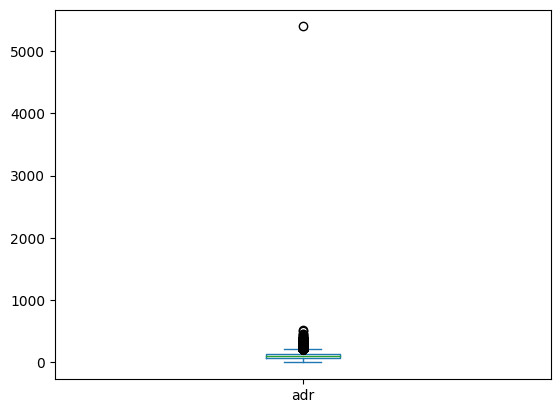

In [78]:
# adr = average daily rate
df['adr'].plot(kind ='box')

In [79]:
df=df[df['adr']<5000]

<Axes: >

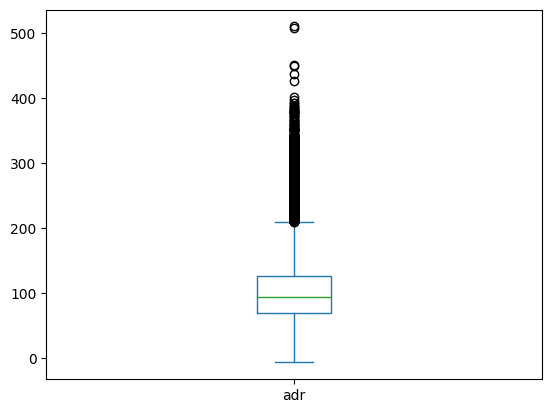

In [80]:
df['adr'].plot(kind ='box')

#Data Analysis and Visualization

In [81]:
cancelled_percentage = df['is_canceled'].value_counts(normalize=True)
cancelled_percentage

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

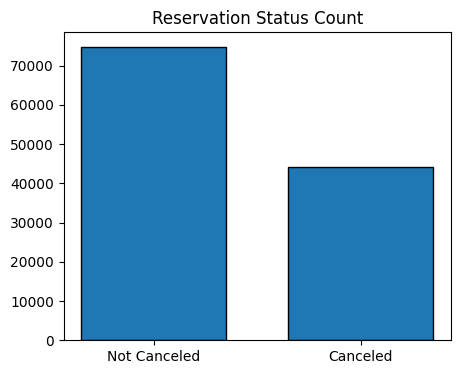

In [82]:
plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts(),width=0.7,edgecolor='k')
plt.show()

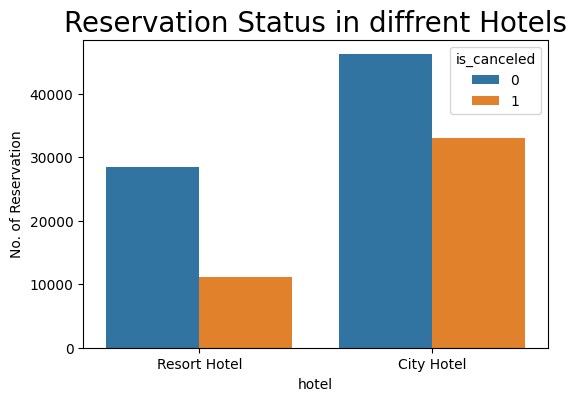

In [83]:
plt.figure(figsize=(6,4))
sns.countplot(x='hotel',hue='is_canceled',data = df)
plt.title('Reservation Status in diffrent Hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('No. of Reservation')
plt.show()

In [84]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [85]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [86]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

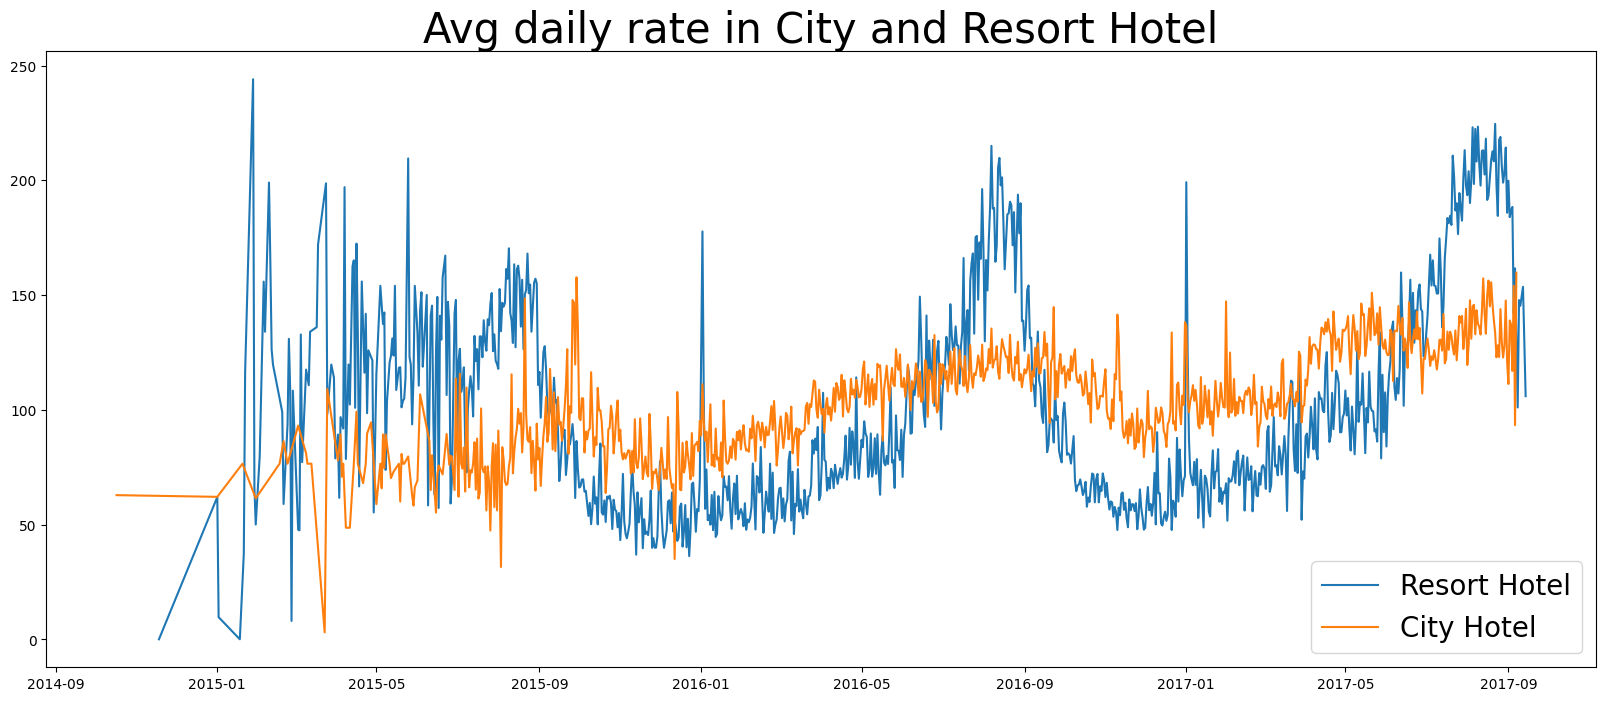

In [87]:
plt.figure(figsize=(20,8))
plt.title('Avg daily rate in City and Resort Hotel',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend(fontsize=20)
plt.show()

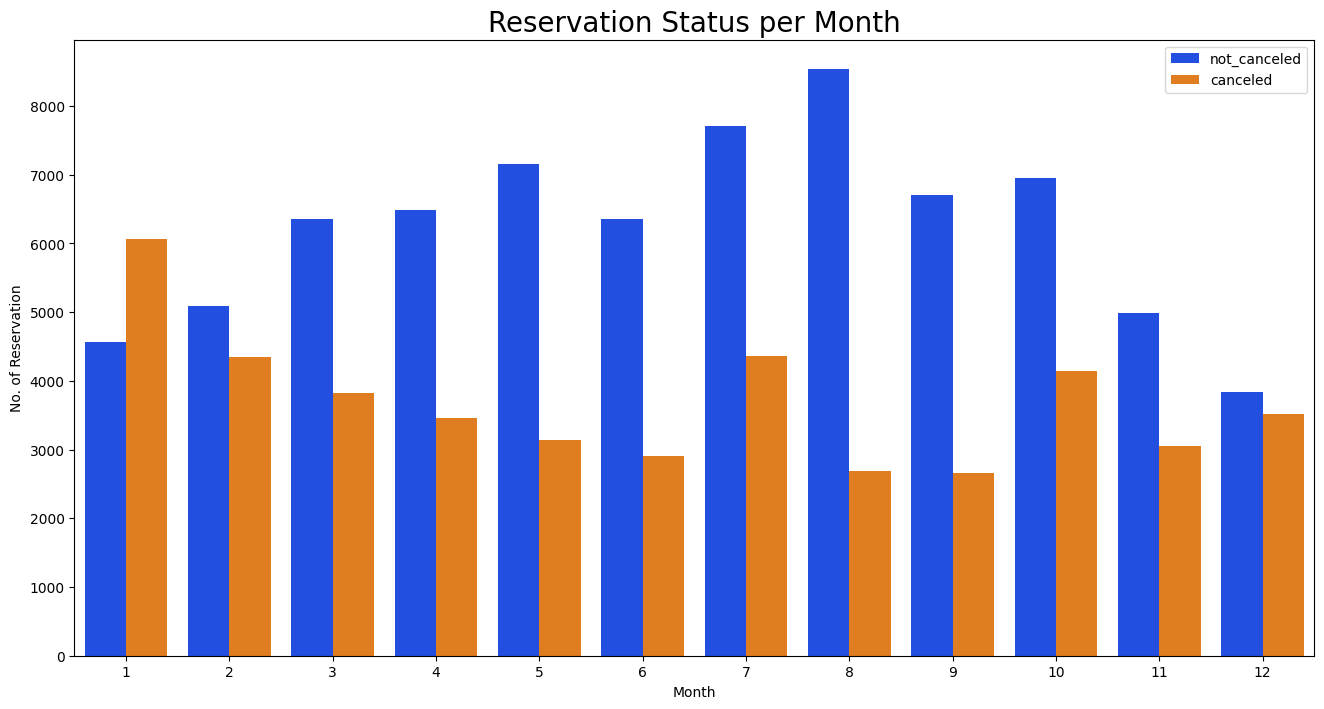

In [88]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
sns.countplot(x='month',hue='is_canceled',data=df,palette='bright')
plt.title('Reservation Status per Month',size=20)
plt.xlabel('Month')
plt.ylabel('No. of Reservation')
plt.legend(['not_canceled','canceled'])
plt.show()

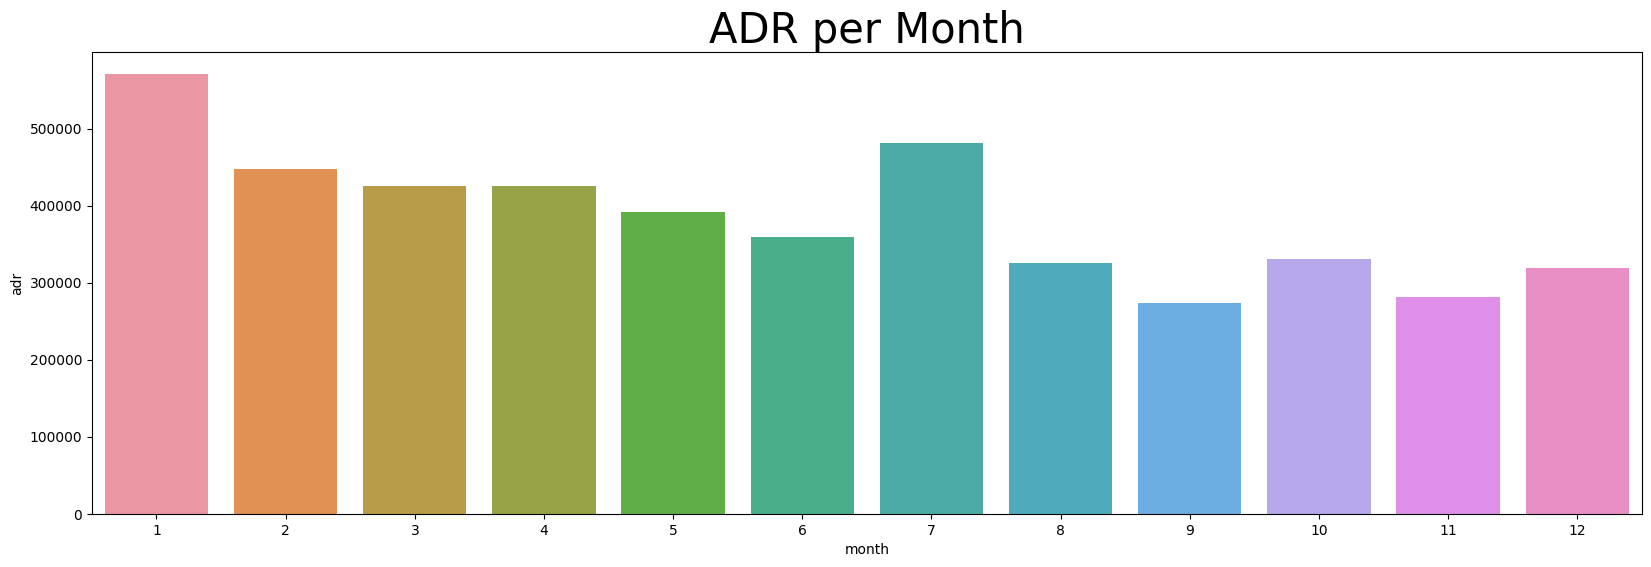

In [89]:
plt.figure(figsize=(20, 6))
plt.title('ADR per Month', fontsize=30)
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()


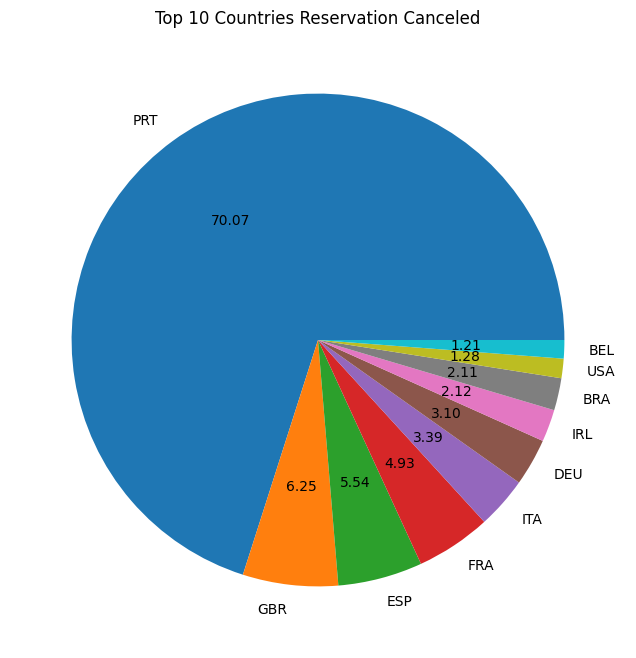

In [90]:
canceled_data = df[df['is_canceled']==1]
top_10_countries = canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 Countries Reservation Canceled')
plt.pie(top_10_countries,autopct='%.2f',labels=top_10_countries.index)
plt.show()

In [91]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [92]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [93]:
canceled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

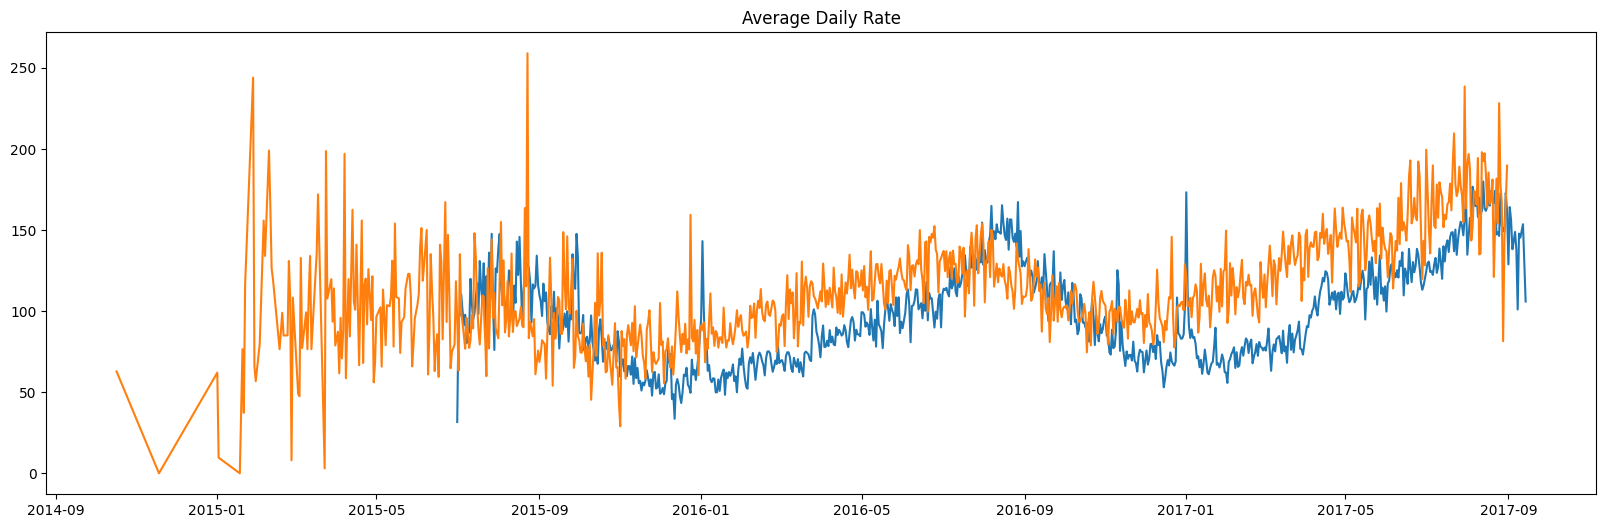

In [94]:
canceled_data_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_data_adr.reset_index(inplace=True)
canceled_data_adr.sort_values('reservation_status_date',inplace=True)

not_canceled_data = df[df['is_canceled']==0]
not_canceled_data_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_data_adr.reset_index(inplace=True)
not_canceled_data_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_canceled_data_adr['reservation_status_date'],not_canceled_data_adr['adr'])
plt.plot(canceled_data_adr['reservation_status_date'],canceled_data_adr['adr'])
plt.show()

In [95]:
canceled_data_adr = canceled_data_adr[(canceled_data_adr['reservation_status_date'] > '2016') & (canceled_data_adr['reservation_status_date'] < '2017-09')]
not_canceled_data_adr = not_canceled_data_adr[(not_canceled_data_adr['reservation_status_date'] > '2016') & (not_canceled_data_adr['reservation_status_date'] < '2017-09')]


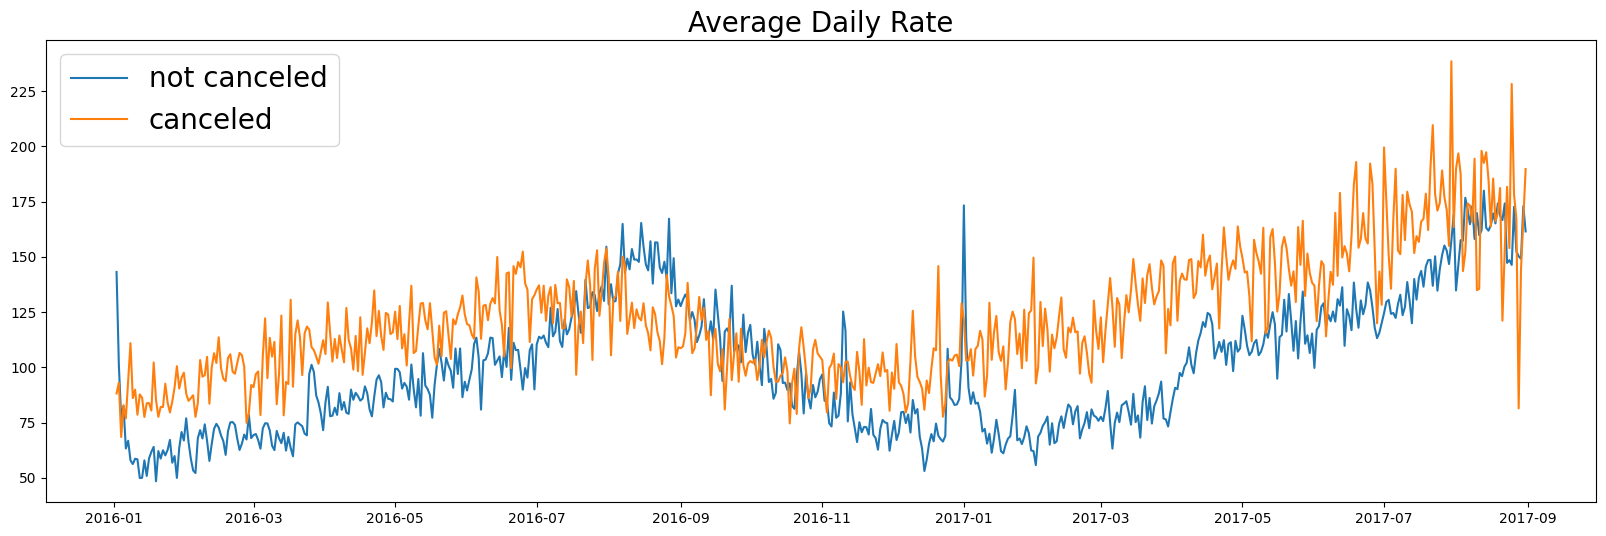

In [96]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate',fontsize=20)
plt.plot(not_canceled_data_adr['reservation_status_date'],not_canceled_data_adr['adr'],label='not canceled')
plt.plot(canceled_data_adr['reservation_status_date'],canceled_data_adr['adr'],label='canceled')
plt.legend(fontsize=20)
plt.show()